In [ ]:
print("786")

786


In [ ]:
import torch
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# getting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dataset_path = "/content/drive/MyDrive/Colab Notebooks/Alzheimers disease /Dataset/train"
test_dataset_path = "/content/drive/MyDrive/Colab Notebooks/Alzheimers disease /Dataset/test"

In [ ]:
transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomRotation(10),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [ ]:
train_set = torchvision.datasets.ImageFolder(root= train_dataset_path, transform= transforms)
test_set = torchvision.datasets.ImageFolder(root= test_dataset_path, transform= transforms)

In [ ]:
print("Total Train data: ", len(train_set))
print("Total Test data: ", len(test_set))

Total Train data:  20000
Total Test data:  4000


In [ ]:
def show_transformed_images(dataset):
  loader = torch.utils.data.DataLoader(dataset, batch_size= 6, shuffle= True)
  batch = next(iter(loader))
  images, labels = batch

  grid = torchvision.utils.make_grid(images, nrow= 3)
  plt.imshow(np.transpose(grid, (1,2,0)))
  print("labels: ", labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels:  tensor([1, 3, 1, 2, 3, 0])


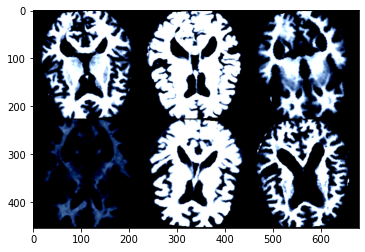

In [ ]:
show_transformed_images(train_set)

# Visualize our dataset

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import seaborn as sns

In [ ]:
valid_size= 0.2 # taking 20% data as out validation set
num_train = len(train_set)
indices = list(range(num_train))
print('Total number of our train data: ',len(indices))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
#print(split)
train_idx, valid_idx = indices[split:], indices[:split]
print('After splitting train data: ',len(train_idx))
print('After splitting validation data: ',len(valid_idx))

Total number of our train data:  20000
After splitting train data:  16000
After splitting validation data:  4000


In [ ]:
num_workers = 0
batch_size = 32

# obtain training indices that will be used for validation
num_train = len(train_set)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
# image classes
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [ ]:
%matplotlib inline

# helper function to display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

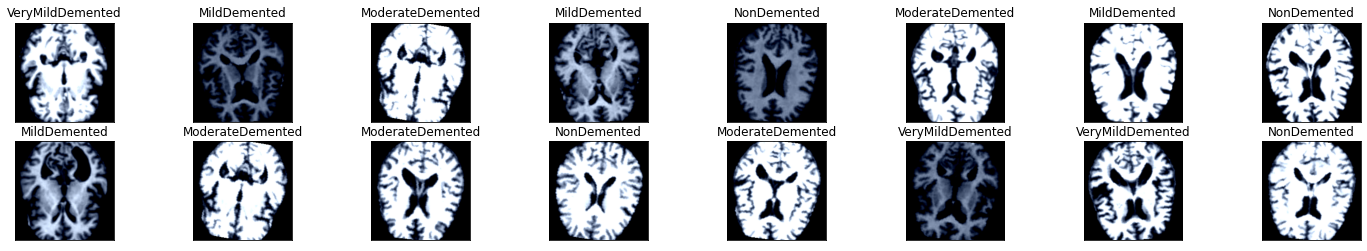

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # Converted Image to numpy

# plot the images in the batch, along with the corresponding labels

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [ ]:
#Now using the AlexNet
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)

#Model description
AlexNet_model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Updating the second classifier
AlexNet_model.classifier[4] = nn.Linear(4096,1024)

#Updating the third and the last classifier that is the output layer of the network. Make sure to have 4 output nodes if we are going to get 4 class labels through our model.
AlexNet_model.classifier[6] = nn.Linear(1024,4)

In [ ]:
a = 'zingals'
print('hello',a)
print('hola '+ a)

hello zingals
hola zingals


In [ ]:
AlexNet_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
model = AlexNet_model
model.cuda()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# optimizer
optimizer = optim.SGD(model.classifier.parameters(), lr=0.001, momentum=0.9)
# loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss
valid_list= []  # stores validation losses
train_list= []  # stores train losses
#train_acc_hist = []
#val_acc_hist = []

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    #train_acc = 0.0
    valid_loss = 0.0
    #valid_acc = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        #train_acc += torch.sum(output == target)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
        #valid_acc += torch.sum(output == target)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    #train_acc = train_acc.double() / len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    #valid_acc = valid_acc.double() / len(valid_loader.sampler)

    #Storing loss value after each epochs
    train_list.append(train_loss)
    valid_list.append(valid_loss)
    #Storing training and validation accuray
    #train_acc_hist.append(train_acc)
    #val_acc_hist.append(valid_acc)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    #print('Epoch: {} \tTraining Accuracy: {:.2f} \tValidation Accuracy: {:.2f'.format(epoch, train_acc, valid_acc))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'alexnet_alzheimer.pt')
        valid_loss_min = valid_loss

    
    

Epoch: 1 	Training Loss: 0.728163 	Validation Loss: 0.597354
Validation loss decreased (inf --> 0.597354).  Saving model ...
Epoch: 2 	Training Loss: 0.662492 	Validation Loss: 0.544642
Validation loss decreased (0.597354 --> 0.544642).  Saving model ...
Epoch: 3 	Training Loss: 0.624019 	Validation Loss: 0.534942
Validation loss decreased (0.544642 --> 0.534942).  Saving model ...
Epoch: 4 	Training Loss: 0.596196 	Validation Loss: 0.504702
Validation loss decreased (0.534942 --> 0.504702).  Saving model ...
Epoch: 5 	Training Loss: 0.563245 	Validation Loss: 0.486743
Validation loss decreased (0.504702 --> 0.486743).  Saving model ...
Epoch: 6 	Training Loss: 0.542306 	Validation Loss: 0.458122
Validation loss decreased (0.486743 --> 0.458122).  Saving model ...
Epoch: 7 	Training Loss: 0.512259 	Validation Loss: 0.406424
Validation loss decreased (0.458122 --> 0.406424).  Saving model ...
Epoch: 8 	Training Loss: 0.493434 	Validation Loss: 0.390770
Validation loss decreased (0.40642

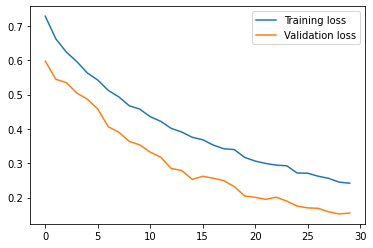

In [ ]:
# plotting the training and validation loss
plt.plot(train_list, label='Training loss')
plt.plot(valid_list, label='Validation loss')
plt.legend()
plt.show()

In [ ]:
model.load_state_dict(torch.load('alexnet_alzheimer.pt'))

<All keys matched successfully>

In [ ]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, num_workers=num_workers)

**Accuracy on Test data**

In [ ]:
n_corrects= 0
n_samples= 0

#vgg16.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    _, pred = torch.max(output, 1)    
    n_corrects += (pred== target).sum().item()
    n_samples += target.size(0)

print(f'Overall accuracy {(n_corrects / n_samples)*100}%')

Overall accuracy 62.125%


**Accuracy on Validation Set**

In [ ]:
def get_accuracy(data_set, dataset_type, model):
  n_corrects = 0
  n_samples = 0
  
  for data, target in data_set:
    if train_on_gpu:
      data, target = data.cuda(), target.cuda()
    
    output = model(data)
    _, pred = torch.max(output, 1)
    n_corrects += (pred == target).sum().item()
    n_samples += target.size(0)

  print(f'Overall accuracy for {dataset_type} is: {(n_corrects/ n_samples)* 100}%')

In [ ]:
get_accuracy(valid_loader, "validation set", model)

Overall accuracy for validation set is: 95.25%


Accuracy on train data

In [ ]:
n_corrects= 0
n_samples= 0

#vgg16.eval()
# iterate over test data
for data, target in train_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    _, pred = torch.max(output, 1)    
    n_corrects += (pred== target).sum().item()
    n_samples += target.size(0)

print(f'Overall accuracy {(n_corrects / n_samples)*100}%')

Overall accuracy 97.225%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

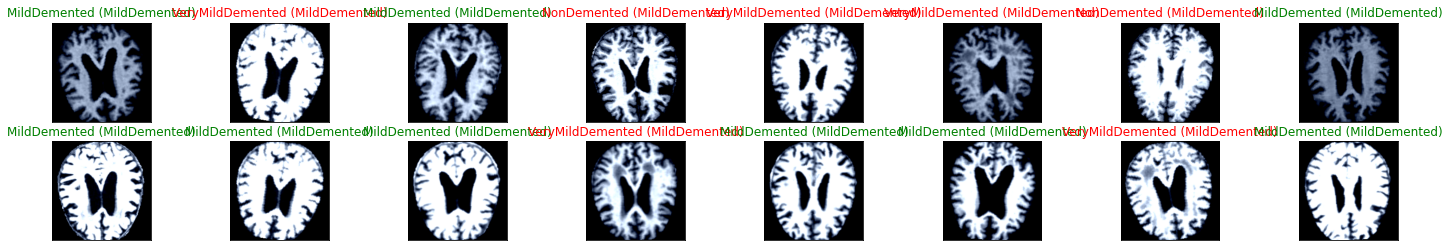

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx] if not train_on_gpu else images[idx].cpu())
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

In [ ]:
@torch.no_grad()
def prediction(cnn, batch_loader):
  total_preds = torch.tensor([]).cuda()
  for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    #print(len(output))
    # convert output probabilities to predicted class
    _,pred = torch.max(output, 1) 
    #print(pred)
    total_preds = torch.cat(
            (total_preds, output)
            ,dim=0
        )
  return total_preds

In [ ]:
# Function to plot confusion matrix

from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
with torch.no_grad():
    test_prediction_loader = torch.utils.data.DataLoader(test_set, batch_size=16)
    test_preds = prediction(model, test_prediction_loader)

Confusion matrix, without normalization


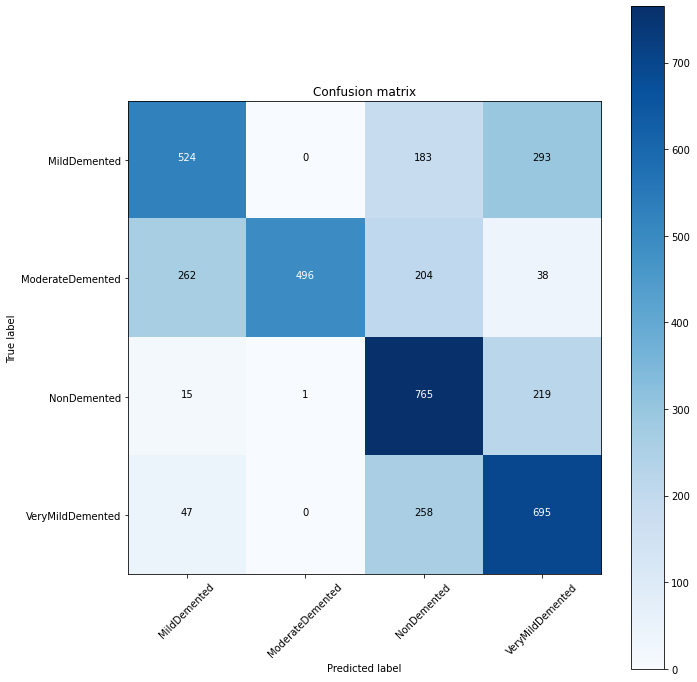

In [ ]:
test_preds = test_preds.cpu()
conf_matrix = confusion_matrix(test_set.targets, test_preds.argmax(dim= 1))
plt.figure(figsize=(10,10))
plot_confusion_matrix(conf_matrix, train_set.classes)